# Idee
-- modello per indovinare la regione dalle descrizioni? difficile? 

-- in base agli aggettivi della descrizione e alla regione prevedere il vino? o solo la tipologia? il prezzo? boh

-- classificare i vini in base alle descrizioni in cluster? a cosa può servire?

-- quanto DOVREBBE costare una bottiglia rispetto alle recensioni ricevute?  "percieved value"

# *Possibile proposta*

1) prevedere se a un determinato sommelier piacerà un determinato vino in base alle descrizioni dei vari vini? VIsto che nella taster "experience" analysis sembra palese che ci siano delle preferenze, magari a un'azienda vinicola che deve far assaggiare suoi prodotti a lui potrebbe interessare sapere le caratteristiche comuni di quelle che ha votato bene...

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv("winemag-data-130k-v2.csv")
data.drop(columns=["Unnamed: 0"],inplace=True)
len(data)

129971

In [2]:
data

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [3]:
len(data[data.duplicated('description',keep=False)].sort_values('description'))

20026

In [5]:
len(data[data.duplicated(['description',"price","points","country","province","title"],keep=False)].sort_values('description'))

19966

In [6]:
data = data.drop_duplicates(["description","price","points","taster_name","title"])
len(data)

119988

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119988 entries, 0 to 129970
Data columns (total 13 columns):
country                  119929 non-null object
description              119988 non-null object
designation              85443 non-null object
points                   119988 non-null int64
price                    111593 non-null float64
province                 119929 non-null object
region_1                 100428 non-null object
region_2                 46769 non-null object
taster_name              95071 non-null object
taster_twitter_handle    90542 non-null object
title                    119988 non-null object
variety                  119987 non-null object
winery                   119988 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 12.8+ MB


.. tanti null sulla parte della designation, sulel due regioni e sui nomi dei reviewers

In [8]:
len(data["title"].unique())

118840

In [9]:
data["title"].unique()

array(['Nicosia 2013 Vulkà Bianco  (Etna)',
       'Quinta dos Avidagos 2011 Avidagos Red (Douro)',
       'Rainstorm 2013 Pinot Gris (Willamette Valley)', ...,
       'Domaine Gresser 2013 Kritt Gewurztraminer (Alsace)',
       'Domaine Marcel Deiss 2012 Pinot Gris (Alsace)',
       'Domaine Schoffit 2012 Lieu-dit Harth Cuvée Caroline Gewurztraminer (Alsace)'],
      dtype=object)

# Missing values and correlations

In [10]:
"""
missingOnlyName = 0
missingOnlyTwitter = 0
missingBoth = 0
lis = []
for idx,row in data.iterrows():
    #print(row["taster_name"])
    if(pd.isnull(row["taster_name"]) and (not pd.isnull(row["taster_twitter_handle"]))):
        missingOnlyName = missingOnlyName + 1
    if(pd.isnull(row["taster_twitter_handle"]) and (not pd.isnull(row["taster_name"]))):
        missingOnlyTwitter = missingOnlyTwitter + 1
    if(pd.isnull(row["taster_name"]) and pd.isnull(row["taster_twitter_handle"])):
        missingBoth = missingBoth + 1
    couple = [row["taster_name"],row["taster_twitter_handle"]]
    if not couple in lis:
        lis.append(couple)
print(missingOnlyName,missingOnlyTwitter,missingBoth)
print(lis,len(lis))
"""
data.drop(["taster_twitter_handle"],axis=1,inplace=True)

C:\Users\gneur\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Dato che le twitter handle mancanti sono più dei nomi mancanti e non ci sono coppie (nome,twitter) del tipo ("nan","@sticaz") dalle quali si poteva risalire al nome originale così da avere meno valori sconosciuti, si può droppare tranquillamente il twitter handle senza perdere nulla

In [11]:
data

,country,description,designation,points,price,province,region_1,region_2,taster_name,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [12]:
len(data["country"].unique())

44

In [13]:
avgPriceWinery = data.groupby("winery")#.price.mean()
#avgPriceWinery.get_group("1+1=3").price.mean()

In [14]:
data['price'] = data.apply(
    lambda row: avgPriceWinery.get_group(row["winery"]).price.mean() if pd.isnull(row['price']) else row['price'],
    axis=1
)
data["price"].fillna(data["price"].mean(),inplace=True)

#prende solo recensioni con autore conosciuto, ha senso come cosa?
#data.dropna(subset=["taster_name"],inplace=True)

data.fillna("unknown",inplace=True)

C:\Users\gneur\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\gneur\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\gneur\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#in

In [15]:
data

,country,description,designation,points,price,province,region_1,region_2,taster_name,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,17.000000,Sicily & Sardinia,Etna,unknown,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,unknown,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,unknown,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.000000,Northern Spain,Navarra,unknown,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.000000,Sicily & Sardinia,Vittoria,unknown,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,unknown,87,24.000000,Alsace,Alsace,unknown,Roger Voss,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.000000,Rheinhessen,unknown,unknown,Anna Lee C. Iijima,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.000000,Alsace,Alsace,unknown,Roger Voss,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [16]:
data[data["country"] == "Italy"]

,country,description,designation,points,price,province,region_1,region_2,taster_name,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,17.000000,Sicily & Sardinia,Etna,unknown,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.000000,Sicily & Sardinia,Vittoria,unknown,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
13,Italy,This is dominated by oak and oak-driven aromas...,Rosso,87,36.590763,Sicily & Sardinia,Etna,unknown,Kerin O’Keefe,Masseria Setteporte 2012 Rosso (Etna),Nerello Mascalese,Masseria Setteporte
22,Italy,Delicate aromas recall white flower and citrus...,Ficiligno,87,19.000000,Sicily & Sardinia,Sicilia,unknown,Kerin O’Keefe,Baglio di Pianetto 2007 Ficiligno White (Sicilia),White Blend,Baglio di Pianetto
24,Italy,"Aromas of prune, blackcurrant, toast and oak c...",Aynat,87,35.000000,Sicily & Sardinia,Sicilia,unknown,Kerin O’Keefe,Canicattì 2009 Aynat Nero d'Avola (Sicilia),Nero d'Avola,Canicattì
26,Italy,Pretty aromas of yellow flower and stone fruit...,Dalila,87,13.000000,Sicily & Sardinia,Terre Siciliane,unknown,Kerin O’Keefe,Stemmari 2013 Dalila White (Terre Siciliane),White Blend,Stemmari
27,Italy,"Aromas recall ripe dark berry, toast and a whi...",unknown,87,10.000000,Sicily & Sardinia,Terre Siciliane,unknown,Kerin O’Keefe,Stemmari 2013 Nero d'Avola (Terre Siciliane),Nero d'Avola,Stemmari
28,Italy,"Aromas suggest mature berry, scorched earth, a...",Mascaria Barricato,87,17.000000,Sicily & Sardinia,Cerasuolo di Vittoria,unknown,Kerin O’Keefe,Terre di Giurfo 2011 Mascaria Barricato (Cera...,Red Blend,Terre di Giurfo
31,Italy,Merlot and Nero d'Avola form the base for this...,Calanìca Nero d'Avola-Merlot,86,30.750000,Sicily & Sardinia,Sicilia,unknown,unknown,Duca di Salaparuta 2010 Calanìca Nero d'Avola-...,Red Blend,Duca di Salaparuta
32,Italy,"Part of the extended Calanìca series, this Gri...",Calanìca Grillo-Viognier,86,30.750000,Sicily & Sardinia,Sicilia,unknown,unknown,Duca di Salaparuta 2011 Calanìca Grillo-Viogni...,White Blend,Duca di Salaparuta


sarebbe meglio riempire i nan del prezzo basandosi sulla media dei vini venduti dalla stessa cantina?

In [ ]:
from sklearn.preprocessing import LabelEncoder

# encode labels with value between 0 and n_classes-1.
desig_encoder = LabelEncoder()
taster_encoder = LabelEncoder()
variety_encoder = LabelEncoder()
winery_encoder = LabelEncoder()
country_encoder = LabelEncoder()
province_encoder = LabelEncoder()

data['Desig_Code'] = desig_encoder.fit_transform(data['designation'])
data['Taster_Code'] = taster_encoder.fit_transform(data['taster_name'])
data['Variety_Code'] = variety_encoder.fit_transform(data['variety'])
data['Winery_Code'] = winery_encoder.fit_transform(data['winery'])
data['Country_Code'] = country_encoder.fit_transform(data['country'])
data['Province_Code'] = province_encoder.fit_transform(data['province'])

data.head()

In [ ]:
# calculate the correlation matrix
data1 = data[["Country_Code","Province_Code","price","points","Variety_Code","Taster_Code","Winery_Code","Desig_Code"]]
corr = data1.corr()
plt.subplots(figsize =(14, 12))

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)

Price e points sono loosely correlated, perchè la correlation fra country e province è così bassa? forse perchè ci sono tante province all'interno di una nazione

# General analysis

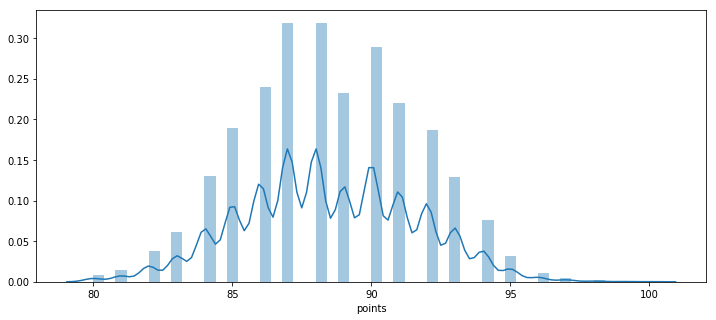

In [17]:
fig, ax = plt.subplots(figsize = (12, 5))
points = data["points"].astype(int)
sns.distplot(points)

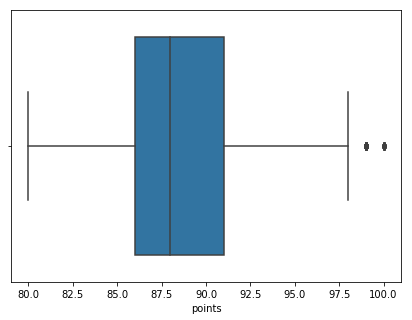

In [18]:
fig, ax = plt.subplots(figsize = (7, 5))
ax =sns.boxplot(data["points"])

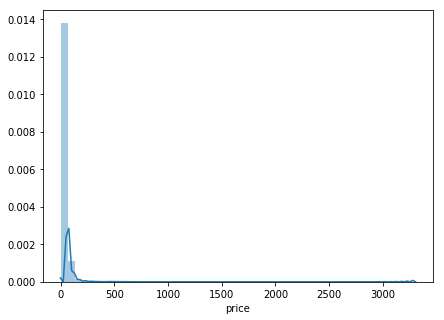

In [19]:
x = data.dropna(subset=["price"])
fig, ax = plt.subplots(figsize = (7, 5))
ax = sns.distplot(x["price"])

La grandissima maggioranza dei vini costa meno di 100 dollari

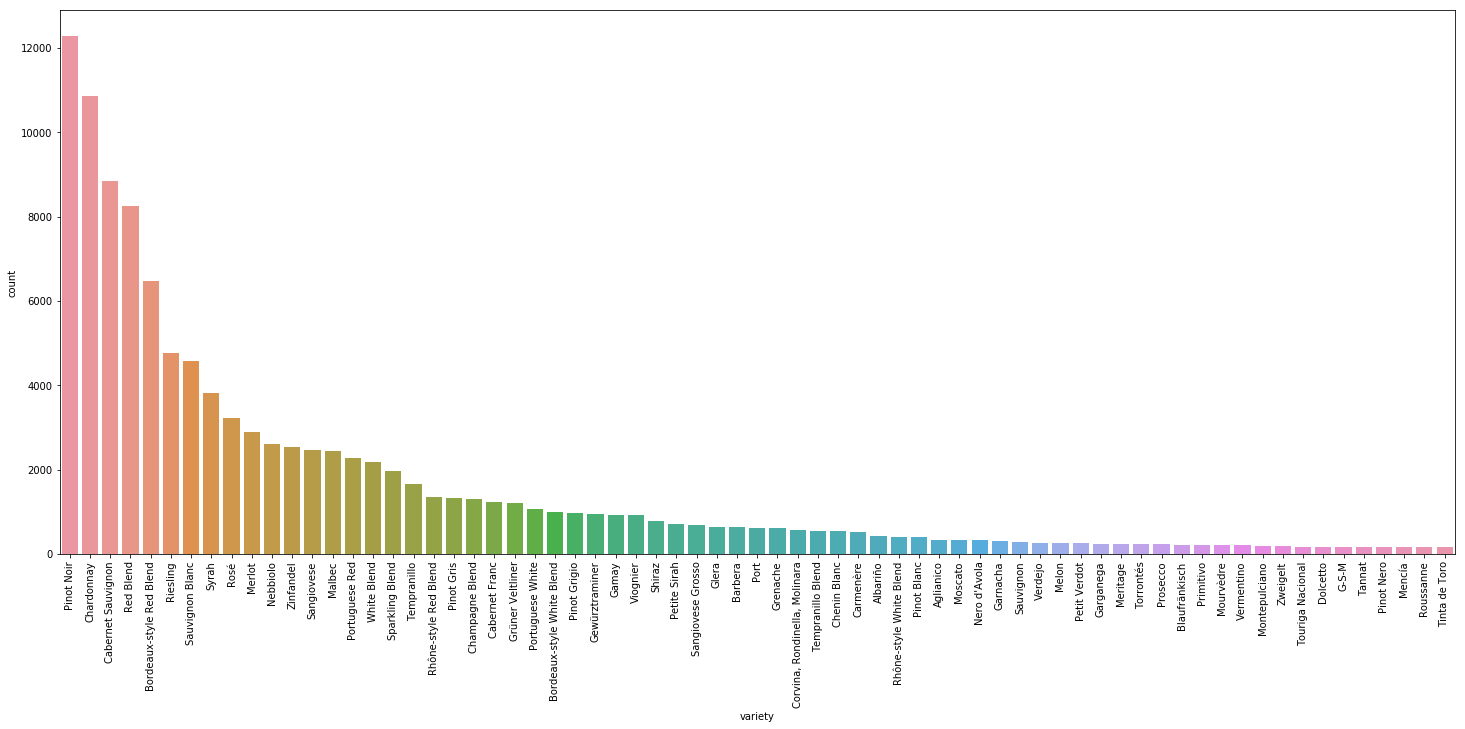

In [20]:
variety_df = data.groupby('variety').filter(lambda x: len(x) > 150)
varieties = variety_df['variety'].value_counts().index.tolist()
fig, ax = plt.subplots(figsize = (25, 10))
sns.countplot(x = variety_df['variety'], order = varieties, ax = ax)
plt.xticks(rotation = 90)
plt.show()

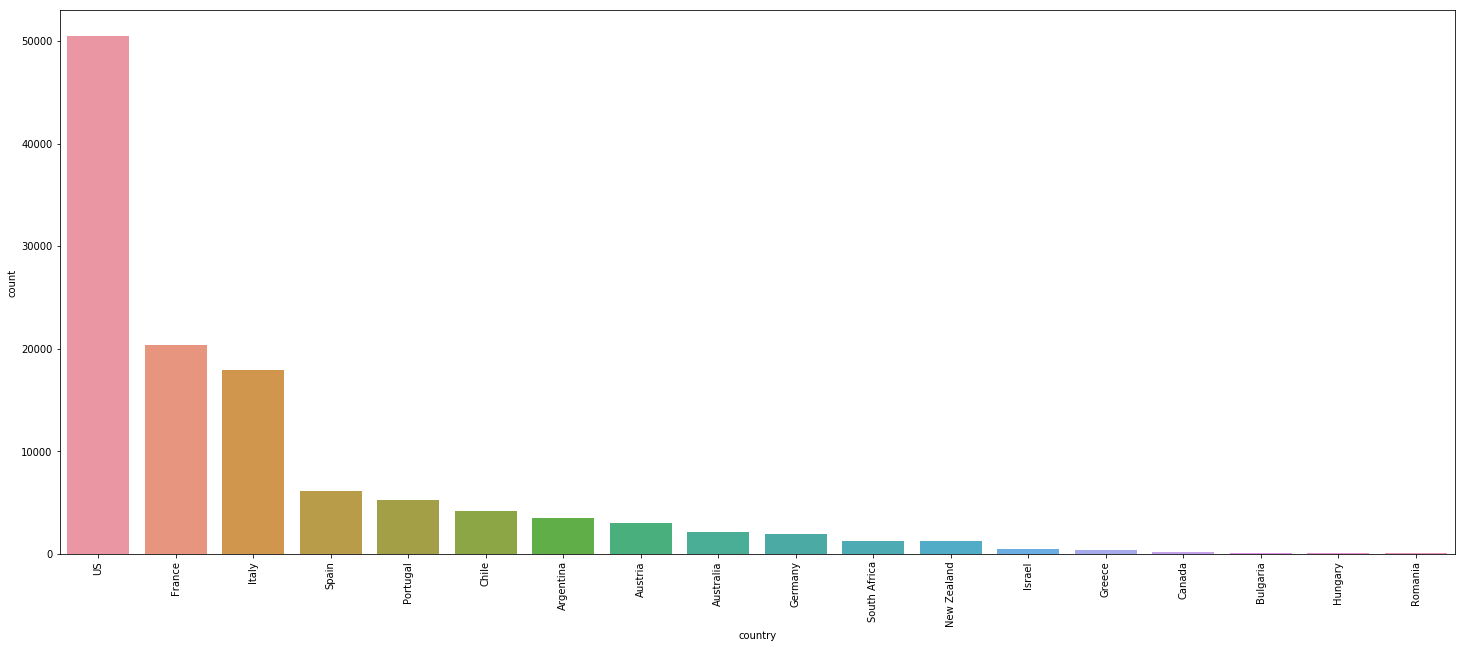

In [21]:
country = data.groupby("country").filter(lambda x: len(x)>100) #> tot perchè così prende i paesi un po' più interessanti visti i numeri
countryInfo = country['country'].value_counts().index.tolist()
fig, ax = plt.subplots(figsize = (25, 10))
sns.countplot(x = country['country'], order = countryInfo, ax = ax)
plt.xticks(rotation = 90)
plt.show()
#country.groups
#country.get_group("Argentina")

In [54]:
country = data.groupby(["country"])
d1 = pd.DataFrame({"count":country["country"].count()}).reset_index()
d1 = d1[d1["count"] > 100].sum()
d1

country    ArgentinaAustraliaAustriaBulgariaCanadaChileFr...
count                                                 119139
dtype: object

In [58]:
d2 = pd.DataFrame({"count":country["country"].count()}).reset_index()
d2 = d2[d2["count"] > 500].sum()
d2

country    ArgentinaAustraliaAustriaChileFranceGermanyIta...
count                                                 117652
dtype: object

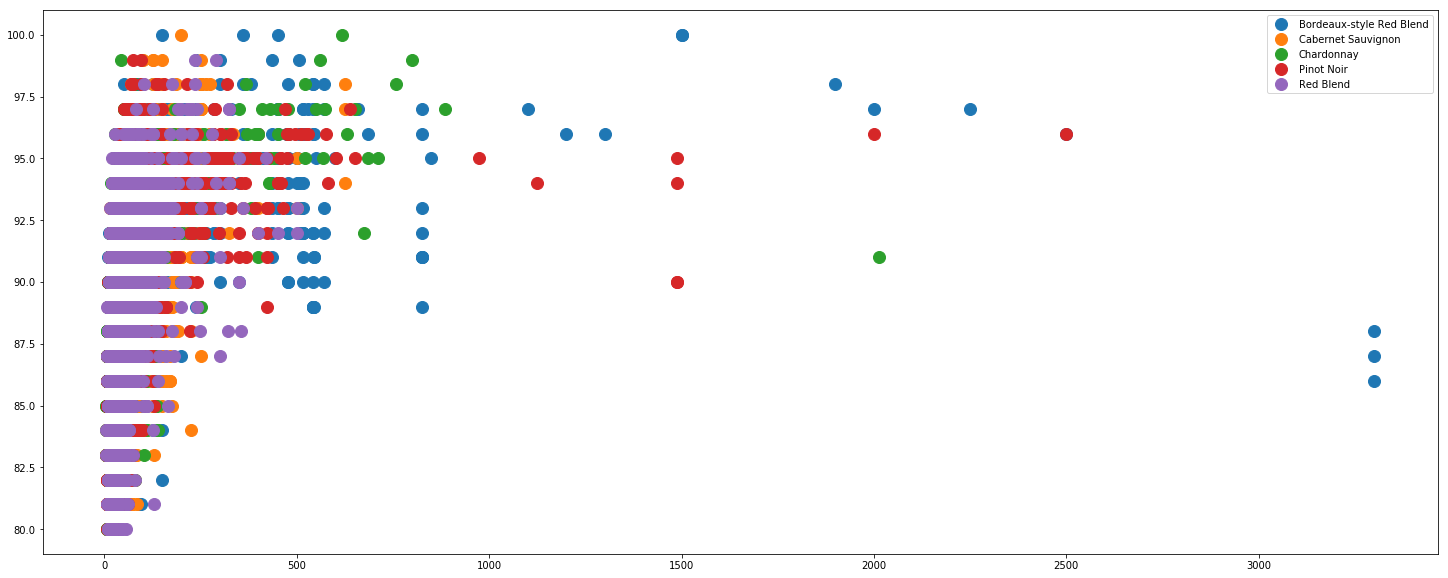

In [22]:
var = data.groupby("variety").filter(lambda x: len(x)>6000)
var = var.groupby("variety")
fig, ax = plt.subplots(figsize = (25, 10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in var:
    ax.plot(group["price"], group["points"], marker='o', linestyle='', ms=12, label=name)
plt.legend()
plt.show()

In [ ]:
sns.lmplot(x="points", y ="price",data = data)

-- In generale si può notare correlazione positiva fra prezzo e qualità: più è alto il prezzo, più tende ad essere buono il vino

In [ ]:
fig, ax = plt.subplots(figsize = (25, 10))
ax = sns.boxplot(x="country", y="points", data=country)

l'argentina, il chile, la romania e la spagna sembrano essere i paesi con le mediane più basse per quanto riguarda i punti. Mentre germania, austria e canada i più alti.

In [ ]:
fig, ax = plt.subplots(figsize = (25, 10))
ax = sns.scatterplot(x="country", y="price", data=country) #il boxplot viene male??

In [ ]:
fig, ax = plt.subplots(figsize = (25, 10))
ax = sns.boxplot(x="country", y="price", data=country) #il boxplot viene male??

In [ ]:
prov = data.groupby("province").filter(lambda x: len(x)>600) #> tot perchè così prende i paesi un po' più interessanti visti i numeri
provInfo = prov['province'].value_counts().index.tolist()
fig, ax = plt.subplots(figsize = (25, 10))
sns.countplot(x = prov['province'], order = provInfo, ax = ax)
plt.xticks(rotation = 90)
plt.show()

il dataset è palesemente "spostato" verso gli stati uniti e in particolare la california

# Winery analysis 

In [ ]:
wineries = data.groupby(["winery"])
d1 = pd.DataFrame({'mean_pts' : wineries["points"].mean(), "mean_price": wineries["price"].mean(),
                   "reviews_number": wineries["description"].nunique(), "variety_number":wineries["variety"].nunique(),
                  "varieties":wineries["variety"].unique().tolist()}
                 ).reset_index()
res = d1.sort_values(["reviews_number","mean_pts"],ascending=False)
res

In [ ]:
res.iloc[0]["varieties"][0]

In [ ]:
#prende quelle con un numero di entry maggiore di 10
res = res[res["reviews_number"] > 10]
fig, ax = plt.subplots(figsize = (25, 10))
ax = sns.scatterplot(x="mean_pts", y="variety_number", data=res)

Si può notare come la parte in mezzo "meh points" facciano un alto numero di vini, mentre quelli con i punteggi più alti si concentrano su meno di 5 varietà. Si può dire che chi si concentra solo su una cosa va meglio? 

In [ ]:
fig, ax = plt.subplots(figsize = (25, 10))
ax = sns.distplot(res["mean_pts"])

In [ ]:
fig, ax = plt.subplots(figsize = (25, 10))
ax = sns.scatterplot(x="mean_pts", y="mean_price", data=res)

Palese la presenza ancora di un trend, anche per quanto riguarda le cantine. Più una cantina ha una media di punteggi migliori, più tende a far pagare le bottiglie, notare come le cantine votate meglio hanno un prezzo più basso rispetto alle altre controparti dai punteggi alti.

# **Taster "experience" analysis** , me gusta, interessante
Curioso per quanto riguarda i tasters, rimaneggio un po' i dati per averli in un altro dataframe più comodo per vedere come si comportano dal punto di vista della varietà di vini assaggiati

In [ ]:
testers = data.groupby("taster_name").filter(lambda x: len(x)>0) #> tot perchè così prende i paesi un po' più interessanti visti i numeri
print(testers["taster_name"].unique())
testerInfo = testers['taster_name'].value_counts().index.tolist()
fig, ax = plt.subplots(figsize = (25, 10))
sns.countplot(x = testers['taster_name'], order = testerInfo, ax = ax)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#togli i taster sconosciuti? 
reviewers = data["taster_name"].unique().tolist()
len(reviewers)
countries = data["country"].unique().tolist()

In [ ]:
countriesTasted = []
for r in reviewers:
    d1 = data[data["taster_name"] == r]
    temp = dict(d1["country"].value_counts())
    wines = d1["variety"].unique().tolist()
    wineries = d1["winery"].unique().tolist()
    countriesTasted.append([r,temp,wines,wineries])
#countriesTasted
stacked = pd.DataFrame(columns = ["taster","#countries","#varieties","#wineries"]+countries)
for i in range(0,len(countriesTasted)):
    stacked.loc[i,"taster"] = (countriesTasted[i][0])
    stacked.loc[i,"#countries"] = len(countriesTasted[i][1])
    stacked.loc[i,"#varieties"] = len(countriesTasted[i][2])
    stacked.loc[i,"#wineries"] = len(countriesTasted[i][3])
    for c in countriesTasted[i][1]:
        stacked.loc[i,c] = countriesTasted[i][1][c]
stacked = stacked.fillna(0)
stacked
#stacked.describe()

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.distplot(stacked["#countries"])
plt.show()

su 44 paesi presenti, tutti hanno assaggiato vini provenienti da meno della metà.

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.distplot(stacked["#varieties"])
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.distplot(stacked["#wineries"])
plt.show()

tanti taster hanno assaggiato vini provenienti da meno di 5 paesi,in media almeno 100 varietà diverse di vino, da generalmente 500 cantine diverse

In [ ]:
t1 = data.groupby(["taster_name","variety"])
t2 = pd.DataFrame({'mean_pts' : t1["points"].mean(), "times_reviewed": t1["description"].count(),
                   "norm_points": 1 - (t1["points"].mean()/ t1["description"].count())} # norm1: 1/(media voto/count), another norm 1-(media voto/conto totale), da valori vicini a 1 per quelli più alti
                 ).reset_index()   #forse è meglio la 1 - ...
#res = d1.sort_values(["reviews_number","mean_pts"],ascending=False)
t2 = t2[t2["times_reviewed"] > 30]
final = t2.sort_values(["times_reviewed","mean_pts"])#,ascending=False)
final

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.distplot(final["times_reviewed"])
plt.show()

In [ ]:
#non contiamo gli unkwnown
f1 = final[final["taster_name"] == "Roger Voss"]
f1

In [ ]:
#based on row data, not normalized based on how many times he reviewed it
fig, ax = plt.subplots(figsize = (10, 10))
ax = sns.scatterplot(x ="mean_pts",y="variety",data=f1)
plt.show()
#normalized attempt
fig, ax = plt.subplots(figsize = (10, 10))
ax = sns.scatterplot(x ="norm_points",y="variety",data=f1)
plt.show()

In [ ]:
#not normalized another author
f2 = final[final["taster_name"] == "Kerin O’Keefe"]
fig, ax = plt.subplots(figsize = (10, 10))
ax = sns.scatterplot(x ="mean_pts",y="variety",data=f2)
plt.show()
fig, ax = plt.subplots(figsize = (10, 10))
ax = sns.scatterplot(x ="norm_points",y="variety",data=f2)
plt.show()

In [ ]:
#testers = data.groupby(["taster_name","country"])
#for name,group in testers:
#    print(name)
#    print(len(group))

Potrebbero esserci "bias" o comunque preferenze dei vini da parte di persone che hanno assaggiato vini provenienti da meno paesi? cioè se uno ha provato vini statunitensi e basta magari ha assegnato un voto più alto di quello che uno che ha assaggiato 203020 vini da paesi diversi perchè magari non ha idea di cosa voglia dire

magari da provare a comparare i punteggi sugli stessi vini fra personaggi diversi

controlla anche le cose della designation "designationThe vineyard within the winery where the grapes that made the wine are from"

In [ ]:
"""
desig = data.groupby(["designation"])
desig["designation"].count()
"""


In [ ]:
revs = data.groupby(["title"]).filter(lambda x: len(x) >= 2)
len(revs)

-- La grandissima maggioranza delle recensioni è "singola", solo una persona ha assaggiato e ha dato il voto? o dups?

In [ ]:
#revs.groupby(["title"]).groups
#pd.DataFrame({'count' : revs.groupby([ "title"] ).size(),"mean":5}).reset_index()


In [ ]:
singleTitleExample = revs[revs["winery"] == "Gloria Ferrer"]
singleTitleExample["title"].unique()

In [ ]:
#singleTitleExample["taster_name"].unique()

In [ ]:
#ex1 = revs[revs["title"] == "Roland Champion NV Brut Rosé  (Champagne)"]
#ex1

In [ ]:
#ex1 = revs[revs["title"] == "Ferrari-Carano 2014 Siena Red (Sonoma County)"]
#ex1

In [ ]:
#ex1 = revs[revs["title"] == "Liebart-Régnier NV Brut  (Champagne)"]
#ex1 

Stessi reviewer due descrizioni diverse, con voti diversi, sullo stesso titolo, ma con prezzi diversi? Wot? Sempre un problema che molti reviewer sono senza nome

# analisi veloce delle recensioni senza nome
non so se tenerle o meno

In [ ]:
unknown = data[data["taster_name"] == "unknown"]
len(unknown)

In [ ]:
data2 = unknown[["Country_Code","Province_Code","price","points","Variety_Code","Winery_Code","Desig_Code"]]
corr = data2.corr()
plt.subplots(figsize =(14, 12))

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)

le correlazioni sono più alte

In [ ]:
country = unknown.groupby("country").filter(lambda x: len(x)>100) #> tot perchè così prende i paesi un po' più interessanti visti i numeri
countryInfo = country['country'].value_counts().index.tolist()
fig, ax = plt.subplots(figsize = (10, 10))
sns.countplot(x = country['country'], order = countryInfo, ax = ax)
plt.xticks(rotation = 90)
plt.show()


recensioni fatte solo per quanto riguarda usa, italia, australia, francia e chile. 24 mila

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.boxplot(x="country", y="points", data=country)